<H3> Distributions <H/3>

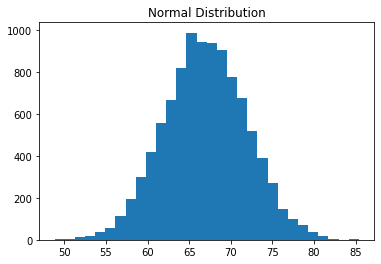

In [321]:
import numpy as np
import matplotlib.pyplot as plt

mean, std = 67, 5
normal_distribution = np.random.normal(mean, std, 10000)

plt.hist(normal_distribution, 30)
plt.title('Normal Distribution')
plt.show()

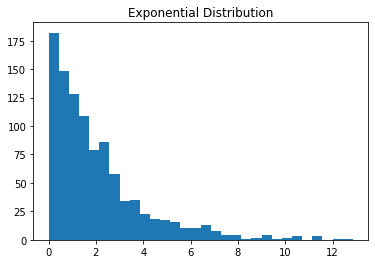

In [323]:
# Exponential distribution
scale = 50
exp_distribution = np.random.exponential(shape, 1000)
plt.hist(exp_distribution, 30)
plt.title('Exponential Distribution')
plt.show()


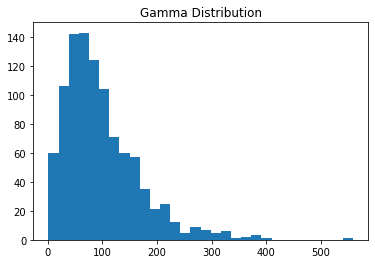

In [326]:
# Gamma distribution
shape, scale = 2, 50
poisson_distribution = np.random.gamma(shape, scale, 1000)
plt.hist(poisson_distribution, 30)
plt.title('Gamma Distribution')
plt.show()



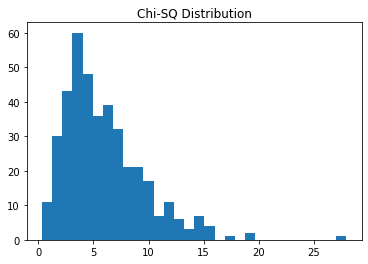

In [230]:
k = 6
Chi_Sq_distribution = np.random.chisquare(k,400)
plt.hist(Chi_Sq_distribution, 30)
plt.title('Chi-SQ Distribution')
plt.show()

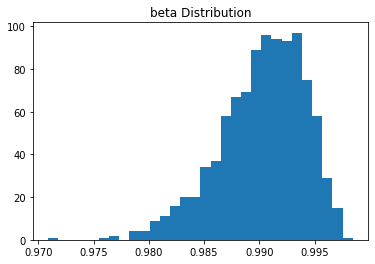

In [327]:
a, b = 600, 6
beta_distribution = np.random.beta(a,b,1000)
plt.hist(beta_distribution, 30)
plt.title('beta Distribution')
plt.show()

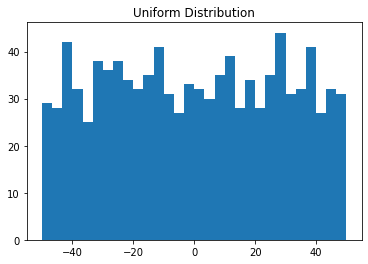

In [328]:
# uniform
limit_one, limit_two = -50, 50
uniform_distribution = np.random.uniform(limit_one, limit_two, 1000)
plt.hist(uniform_distribution, 30)
plt.title('Uniform Distribution')
plt.show()


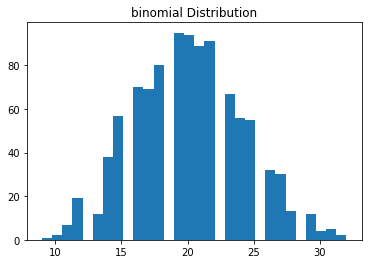

In [247]:
# binomial distribution
n, p = 100, .2  # number of trials, probability of each trial
binomial_distribution = np.random.binomial(n, p, 1000)
plt.hist(binomial_distribution , 30)
plt.title('binomial Distribution')
plt.show()

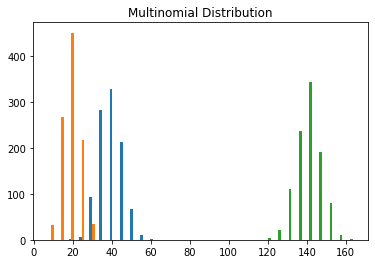

In [244]:
# multinomial distribution
n = 200; p = [0.2, 0.1, 0.5]
multinomial_distribution = np.random.multinomial(n, p, 1000)
plt.hist(multinomial_distribution , 30)
plt.title('Multinomial Distribution')
plt.show()

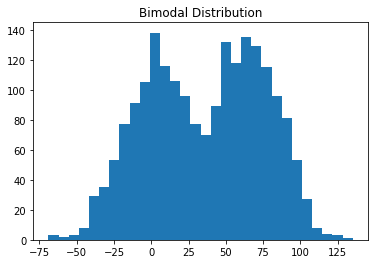

In [329]:
# bimodal
mean, std = 67, 20
distribution_one = np.random.normal(mean, std, 1000)
mean, std = 4, 23
distribution_two = np.random.normal(mean, std, 1000)

bimodal_distribution = np.concatenate([distribution_one, distribution_two])
plt.hist(bimodal_distribution, 30)
plt.title('Bimodal Distribution')
plt.show()

<H3> Central Limit Theorem </H3>
 

If you have a population with mean $\mu$ and standard deviation $\sigma$ and take sufficiantly large (usually n $\geq$ 30) random samples from the population with replacement, then the distribution of the *sample means* will be approximatedly normally distributed (even if population distribution is not normal). If the population is normal, then the theorem holds true even for samples smaller than 30. 

We can uderstand something about the population from the distribution of our samples.

$\mu_\bar{x}$ = $\mu$ mean of the distribution of *sample means* equals to population mean

$\sigma_\bar{x}$ = $\frac{\sigma}{\sqrt{n}}$ standard deviation of the sample means equals to population standard deviation divided by the sqrt of your sample size

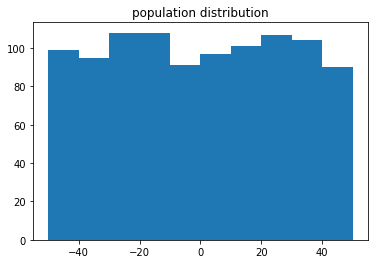

population mean = 101.3208, population std = 71.7616


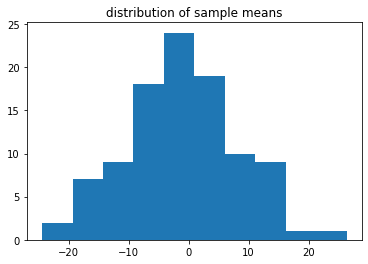

mean of sample means = -1.0372, std of sample means = 9.2208 
estimated population st dev 29.1587221418178


In [367]:
mean, std = 15, 5
distribution = np.random.normal(15, std , 10000)

scale, shape = 50, 2 
distribution = np.random.gamma(shape,scale,10000)
mean = scale*shape; std = np.sqrt(mean)

number_of_samples = 100
n = 10

sample_means = [np.mean(np.random.choice(uniform_distribution, n)) for _ in range(number_of_samples)] # draw samples from the distribution

plt.hist(uniform_distribution)
plt.title('population distribution')
plt.show()
print("population mean = {x}, population std = {y}".format(x = round(np.mean(distribution),4), y = round(np.std(distribution),4) ))

plt.hist(sample_means)
plt.title('distribution of sample means')
plt.show()

print("mean of sample means = {x}, std of sample means = {y} "
      .format(x = round(np.mean(sample_means),4), y = round(np.std(sample_means),4), n = n))

print("estimated population st dev {x}".format(x = np.std(sample_means)*np.sqrt(n)))

CLT also apllies to binomial data (0,1), if it satisfies the requirements:

$min(np, n(1-p)) = 5$, where $n$ = number in your sample, $p$ = probability of an event.

Population: 
* mean binomial probability: $\mu = np$
* standard deviation: $\sigma = \sqrt{n(p)(1-p)}$



In [341]:

n = 20 # total sample size
p = 0.16 # probability of event happening

CLT_criteria = np.min([n*p, n*(1 - p)])
mean = n*p
std = np.sqrt(n*(p)*(1-p))

print("CLT_criteria = {x}, population mean = {y}, population st_dev = {z}"
      .format(x = round(CLT_criteria,4), y = round(mean,4), z = round(std,4)))

CLT_criteria = 3.2, population mean = 3.2, population st_dev = 1.6395


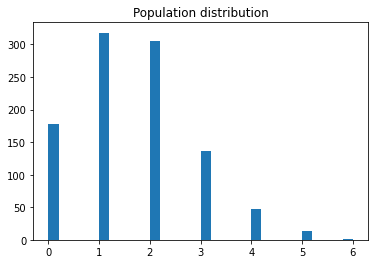

population mean = 1.603, population st_dev = 1.1573


In [369]:
distribution = np.random.binomial(n, p, 1000)
plt.hist(distribution, 30)
plt.title('Population distribution')
plt.show()
print("population mean = {y}, population st_dev = {z}"
      .format(y = round(np.mean(distribution),4), z = round(np.std(distribution),4)))

3.1623


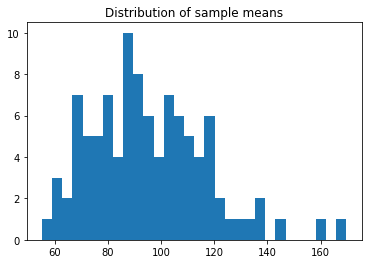

sample mean = 95.3807, st_dev of sample means = 21.5807, n = 10


In [368]:
num_samples = 100

sample_std = std/np.sqrt(n)
print(round(sample_std,4))

sample_means = [np.mean(np.random.choice(distribution, 10)) for _ in range(number_of_samples)] # draw samples from the distribution

plt.hist(sample_means, 30)
plt.title('Distribution of sample means')
plt.show()
print("sample mean = {y}, st_dev of sample means = {z}, n = {n}"
      .format(y = round(np.mean(sample_means),4), z = round(np.std(sample_means),4), n = n))

<H3> t-test </H3>

Determine level of significant between the mean of two groups. The most important assumption of t-tests (as well as all parametric tests) is that your data is **normally distributed and samples are random**. In t-tests we have *one dependent* and *one independent* variable. *t-values* tell you how many standard units are the means of two groups apart.

What affects t-tests?

* how big is the difference between the group?
* how much variability is within each group?
* how big are your samples?
* what's the significance level?
* is it a one-directional or a two-directional test?

There are different types of t-tests

* Independent - comparing means of two samples from different populations

 * Unqual Variance  - when $s_1 \not= s_2$, where $s$ is the standard deviation of the sample, aka Welch's t-test
 
   - $\frac{m_1 - m_2}{\sqrt{\frac{s^2}{n_1} + \frac{s^2}{n_2}}}$
 
   - $df = min(n_1, n_2) - 1$

 * Equal Variance - when $s_1 = s_2$
 
   - $\frac{m_1 - m_2}{\sqrt{\frac{(n_1-1)s_1^2 +(n_2-1)s_2^2}{n_1+n_2-2}(\frac{1}{n_1} + \frac{1}{n_2})}}$
 
   - $df = N - 2$ where N is the sum of two samples

* Paired - within sample comparison 
 - $\frac{m}{s/\sqrt{n}}$ where $m$ and $s$ are the mean and standard deviation of the difference between two samples 
 - $df = n -1$
 

**NOTE**: if your data is not normally distributed, t-test will increase your Type 1 error. You can use Wisconsin ranksum or signrank tests (non-parametric versions of t-tests). They do not assume normality, but they are considered underpowered, meaning increase your Type 2 error, if your data is normal. 


Reading: https://researchbasics.education.uconn.edu/t-test/#

In [1]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy.stats import ranksums

# two independent means
mean, std = 48, 15
population_one = np.random.normal(mean, std, 1000)
mean, std = 50, 10
population_two = np.random.normal(mean, std, 1000)

scale, shape = 10, 5 
distribution_one = np.random.gamma(shape,scale,1000)
scale, shape = 12,6 
distribution_one = np.random.gamma(shape,scale,1000)

n_one = 30
n_two = 30
sample_one = np.random.choice(population_one, n_one)
sample_two = np.random.choice(population_two, n_two)

plt.figure()
plt.subplot(1,2,1)
plt.hist(sample_one)
plt.xlabel('sample one')
plt.subplot(1,2,2)
plt.hist(sample_two)
plt.xlabel('sample two')

ttest_ind(sample_one,sample_two, equal_var = True)
ranksums(sample_one, sample_two)

NameError: name 'np' is not defined

In [ ]:
# lets assume that two samples came from the same population in different conditions

difference = sample_two - sample_one
population_mean = 0.0
ttest_1samp(difference, population_mean)

<H3> ANOVA </H3>

If you are comparing multiple groups in one category (Factor), one way you can do it is perform a bunch of t-tests and then divide your critical p-value ny number of groups. 

A more common way to compare different groups is to use ANOVA. 

AVONA breaks total variabce in your dataset $(SS_T)$ into between groups variance $(SS_{between})$ and within group variance $(SS_{within})$, creating F-ratio value. 

$SS_{between} = \sum{n( group mean - grand mean)}^2$

$SS_{within} = df * s^2$


$df_{between} = k - 1$

$df_{within} = N - k$

$df_{total} = N - 1$, where $k$ is the number of groups and $N$ is the total sample size

At its core, ANOVA can be thought of as a regression problem:
$y_i = b_0+b_1X_{1,i} +…+b_{j-1,i} + e_i$

ANOVA F-statistics tells you that there is a difference between the groups but it doesnt tell you where the difference it. Post-Hoc (Pairwise) tests are needed to show which groups are different. There are many different post-hoc tests you can do.

**NOTE**: If your data is not normally distributed, you can use Kruskal-Wallis test, which is a non-parametric version of ANOVA. 

**one-way ANOVA** 

In [266]:

from scipy.stats import f_oneway
n = 400
a = np.random.normal(10, 5, n)
b = np.random.normal(11, 14, n)
c = np.random.normal(10, 6, n)

f_oneway(a,b,c)


F_onewayResult(statistic=1.2222483306485694, pvalue=0.29493449505375785)

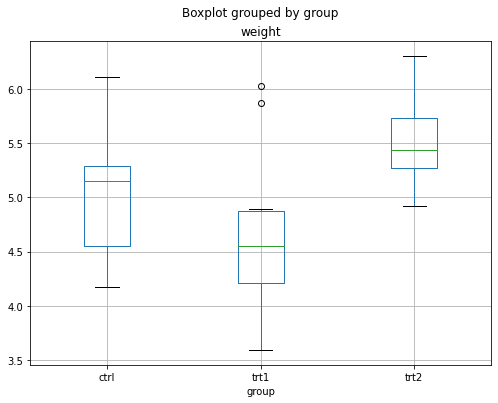

In [289]:
import pandas as pd
datafile = "PlantGrowth.csv"
data = pd.read_csv(datafile)

#Create a boxplot
data.boxplot('weight', by='group', figsize=(8, 6))

ctrl = data['weight'][data.group == 'ctrl']

grps = pd.unique(data.group.values)
d_data = {grp:data['weight'][data.group == grp] for grp in grps}

k = len(pd.unique(data.group))  # number of conditions
N = len(data.values)  # conditions times participants
n = data.groupby('group').size()[0] #Participants in each condition

However, we dont have enough information to calculate df or effect size. 

In [292]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('weight ~ group', data = data).fit()
anova_table = sm.stats.anova_lm(model,typ = 1)
print(anova_table)

            df    sum_sq   mean_sq         F   PR(>F)
group      2.0   3.76634  1.883170  4.846088  0.01591
Residual  27.0  10.49209  0.388596       NaN      NaN


In [293]:
esq_sm = anova_table['sum_sq'][0]/(anova_table['sum_sq'][0]+anova_table['sum_sq'][1])
anova_table['EtaSq'] = [esq_sm, 'NaN']
print(anova_table)


            df    sum_sq   mean_sq         F   PR(>F)     EtaSq
group      2.0   3.76634  1.883170  4.846088  0.01591  0.264148
Residual  27.0  10.49209  0.388596       NaN      NaN       NaN


Reading: https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

**factorial ANOVA**

more than one predictor of your dependent variable
Examples: weight of Olympic athletes based on sex and country, test scores based on sex, hours studied, etc.


In [265]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
moore = sm.datasets.get_rdataset("Moore", "carData", cache=True) # load
data = moore.data
data = data.rename(columns={"partner.status" :
                            "partner_status"}) # make name pythonic
moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)',
                 data=data).fit()
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 Anova DataFrame
print(table)

                                              sum_sq    df          F  \
C(fcategory, Sum)                          11.614700   2.0   0.276958   
C(partner_status, Sum)                    212.213778   1.0  10.120692   
C(fcategory, Sum):C(partner_status, Sum)  175.488928   2.0   4.184623   
Residual                                  817.763961  39.0        NaN   

                                            PR(>F)  
C(fcategory, Sum)                         0.759564  
C(partner_status, Sum)                    0.002874  
C(fcategory, Sum):C(partner_status, Sum)  0.022572  
Residual                                       NaN  


Reading: https://www.marsja.se/three-ways-to-carry-out-2-way-anova-with-python/